### Objective

Objective of this lab is to compare if a different way of splitting test train split will affect the accuracy of the model. Also if a different CNN architecture could improve the model.

In [2]:
import numpy as np
import pandas as pd

import os
os.listdir()

['.ipynb_checkpoints', 'digit-recognizer', 'Number_Image_Classification.ipynb']

### Importing train data

In [3]:
train_data = pd.read_csv("digit-recognizer/train.csv")

train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


### Showing a sample of 18 rows from the train dataset

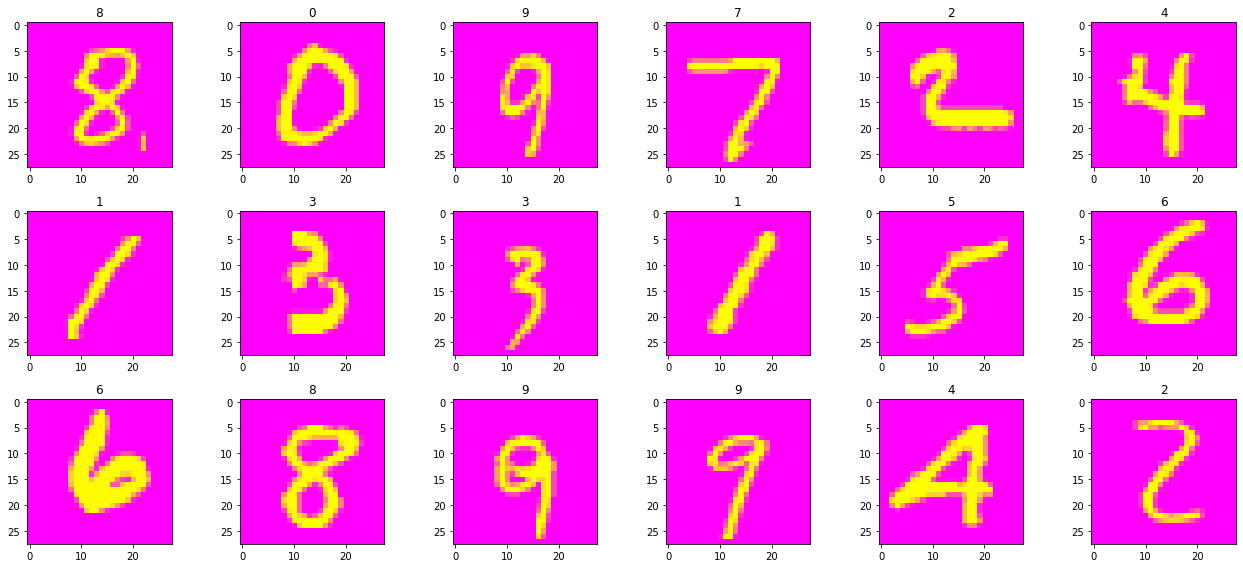

In [5]:
import matplotlib.pyplot as plt

def show_image(train_image, label, index):
    image_shaped = train_image.values.reshape(28,28)
    plt.subplot(3,6,index+1)
    plt.imshow(image_shaped, cmap="spring")
    plt.title(label)


plt.figure(figsize=(18,8))
sample_image = train_data.sample(18).reset_index(drop=True)
for index, row in sample_image.iterrows():
    label = row['label']
    image_pixels = row.drop('label')
    show_image(image_pixels, label, index)
    
plt.tight_layout()

### Train, Test split using K-fold

With reference to https://www.kaggle.com/uysimty/get-start-image-classification/notebook where the user is using a generic train_test_split, in this lab we will be using K-fold train test split to see if the model improves.

In [22]:
X = train_data.drop(columns=["label"])
y = train_data["label"]

X.shape

(42000, 784)

In [23]:
from sklearn.model_selection import KFold
kf = KFold (shuffle=True, random_state=1, n_splits=500)

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index,:],
                                       X.iloc[test_index,:],
                                       y[train_index],
                                       y[test_index]) 

In [24]:
print ("X_train: ", X_train.shape, " X_test: ", X_test.shape)
print ("y_train: ", y_train.shape, " y_test: ", y_test.shape)

X_train:  (41916, 784)  X_test:  (84, 784)
y_train:  (41916,)  y_test:  (84,)


In [25]:
X_train= X_train.values.reshape(X_train.shape[0],28,28,1)
X_train.shape

(41916, 28, 28, 1)

In [26]:
X_test= X_test.values.reshape(X_test.shape[0],28,28,1)

print ("X_train: ", X_train.shape, " X_test: ", X_test.shape)
print ("y_train: ", y_train.shape, " y_test: ", y_test.shape)

X_train:  (41916, 28, 28, 1)  X_test:  (84, 28, 28, 1)
y_train:  (41916,)  y_test:  (84,)


### Build CNN Model

Two models: Model 1 and Model 2 with different CNN Architecture.

#### Model 1

This model architecture follows the user in https://www.kaggle.com/uysimty/get-start-image-classification/notebook. <br>
Model 1 follows the below structure: <br>
    Conv2D --> Conv2D --> MaxPool --> Flatten --> Dense

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                46090     
Total params: 65,194
Trainable params: 65,194
Non-trainable params: 0
_________________________________________________________________


#### Model 2

In Model 2, the CNN architecture we are using is: <br>
Conv2D --> MaxPool -->  Convolution --> MaxPool --> Flatten --> Dense

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

model1 = Sequential()
model1.add(Conv2D(32, kernel_size=3, activation="relu", input_shape=(28,28,1)))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(64, kernel_size=3, activation="relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())

model1.add(Dense(10, activation="softmax"))

model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
__________________________________________________

### Compile Model

In [42]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"] )
model1.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"] )

### Callback

In [38]:
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="val_loss",
                         min_delta=0.001,
                         patience=3,
                         restore_best_weights=True)

### Fit models with training set

#### Model 1

In [40]:
epochs = 100
batch_size = 64

model.fit(X_train, y_train, 
                   batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(X_test, y_test),
                  callbacks=earlystop)

Epoch 1/100
655/655 [==============================] - 34s 52ms/step - loss: 0.0063 - accuracy: 0.9992 - val_loss: 0.6642 - val_accuracy: 0.9643
Epoch 2/100
655/655 [==============================] - 29s 44ms/step - loss: 0.0056 - accuracy: 0.9993 - val_loss: 0.6581 - val_accuracy: 0.9762
Epoch 3/100
655/655 [==============================] - 29s 45ms/step - loss: 0.0062 - accuracy: 0.9995 - val_loss: 0.7028 - val_accuracy: 0.9762
Epoch 4/100
655/655 [==============================] - 30s 45ms/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.8259 - val_accuracy: 0.9643
Epoch 5/100
655/655 [==============================] - 29s 45ms/step - loss: 0.0058 - accuracy: 0.9993 - val_loss: 1.0898 - val_accuracy: 0.9762


#### Model 2

In [43]:
model1.fit(X_train, y_train, 
                   batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(X_test, y_test),
                  callbacks=earlystop)

Epoch 1/100
655/655 [==============================] - 10s 15ms/step - loss: 3.0252 - accuracy: 0.8332 - val_loss: 0.1041 - val_accuracy: 0.9643
Epoch 2/100
655/655 [==============================] - 8s 12ms/step - loss: 0.0761 - accuracy: 0.9781 - val_loss: 0.0505 - val_accuracy: 0.9762
Epoch 3/100
655/655 [==============================] - 8s 12ms/step - loss: 0.0476 - accuracy: 0.9860 - val_loss: 0.0189 - val_accuracy: 0.9881
Epoch 4/100
655/655 [==============================] - 8s 13ms/step - loss: 0.0419 - accuracy: 0.9881 - val_loss: 0.0230 - val_accuracy: 0.9762
Epoch 5/100
655/655 [==============================] - 9s 13ms/step - loss: 0.0322 - accuracy: 0.9907 - val_loss: 0.0684 - val_accuracy: 0.9643
Epoch 6/100
655/655 [==============================] - 8s 13ms/step - loss: 0.0283 - accuracy: 0.9923 - val_loss: 0.1246 - val_accuracy: 0.9762


### Insights

Comparing Model 1 and Model 2, Model 1 has a better accuracy of 99.93% while Model 2 has an accuracy of 99.23%.

Comparing Model 1 with K-Fold and Model 1 with train_test_spilt, the model with K-Fold is better with 99.93%.

K-Fold produces better results as it ensures that all the training dataset has been used to train the model. However, this could lead to an overfitting of model. The best way to evaluate is to use the model to predict a completely new set of data.

### Predict and Evaluate Models

In [44]:
test_data = pd.read_csv("digit-recognizer/test.csv")

test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
test_X = test_data.values.reshape(test_data.shape[0],28,28,1)

print ("test_X: ", test_X.shape)

test_X:  (28000, 28, 28, 1)


#### Model 1

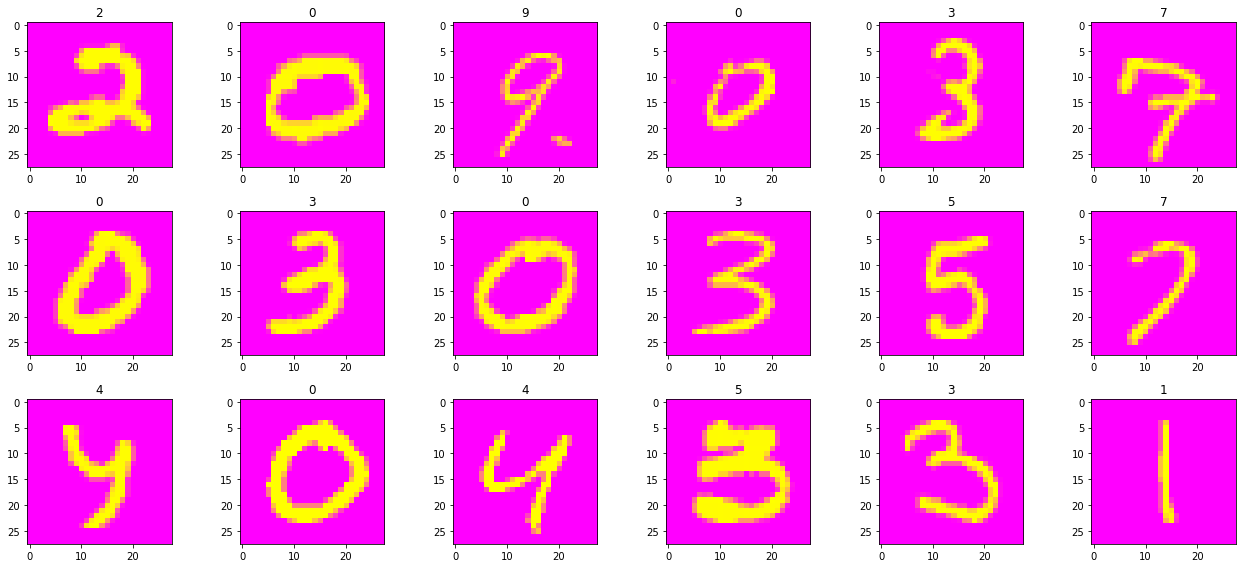

In [48]:
y_pred_1 = model.predict(test_X)
results = np.argmax(y_pred_1, axis=1)

plt.figure(figsize=(18,8))

sample_test=test_data.head(18)

for index, image_pixels in sample_test.iterrows():
    label=results[index]
    show_image(image_pixels, label, index)


plt.tight_layout()    

#### Model 2

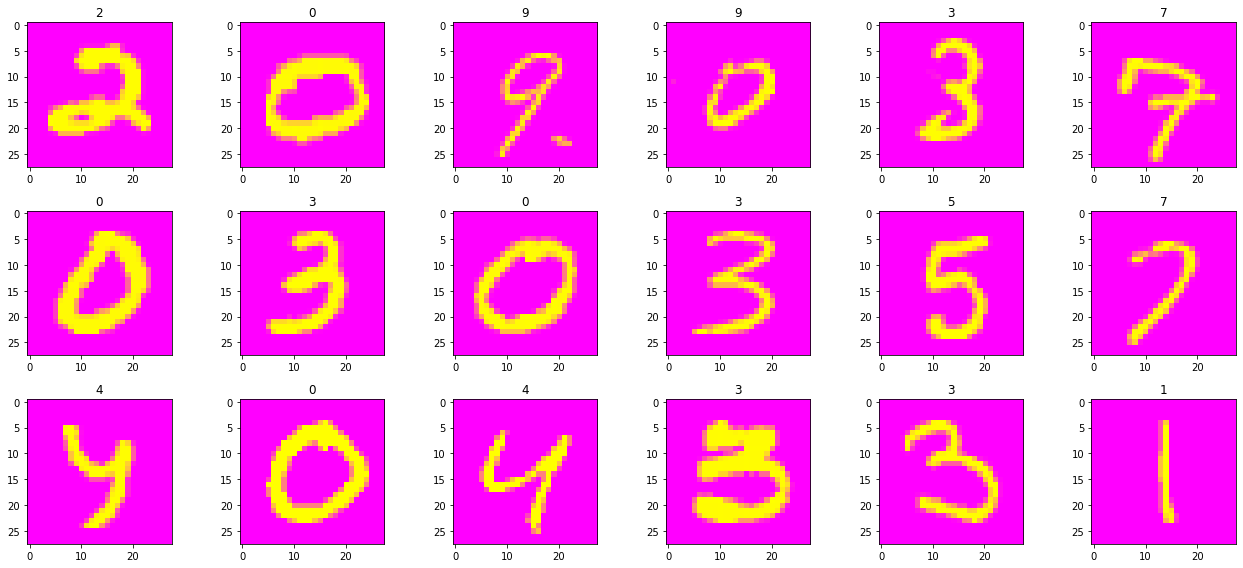

In [49]:
y_pred_2 = model1.predict(test_X)
results1 = np.argmax(y_pred_2, axis=1)

plt.figure(figsize=(18,8))

sample_test=test_data.head(18)

for index, image_pixels in sample_test.iterrows():
    label=results1[index]
    show_image(image_pixels, label, index)


plt.tight_layout()  